In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")

In [2]:
from utils.files import *
from utils.image import *
from feature_vectors import *

# Visualizing feature vectors

First let's load the sample image, resized to 256x256.
The window size is 8x8.

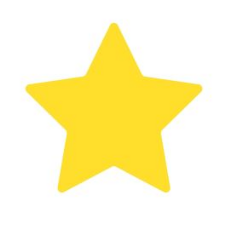

In [3]:
image_path = '.\\samples\\star.jpg'

image = read_image(image_path)
image = resize(image, 256)

# window_size = 8, image_size = 256x256
window_size = 8
norm = "l1"

show_image(image, "")

## HSV Feature Vector 

The feature vector consists of HSV values for each 8x8 cell of an image.
RGB colors in the image represent the dominant HSV values in the subregion, properly scaled for the representation.

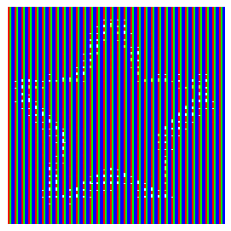

HSV feature vector:  (1024, 24)


In [4]:
# 32x32 cells -> each  8x8 window => (8 bins for h, s, v each - 24 values per window) => (1024, 24) feature vector
hsvimage = hsv_image(image)
hsv_features = get_hsv_features(hsvimage, window_size, norm)
hsv_features_size = int(image.shape[0]/window_size)
show_hsv_histograms_image(image, hsv_features, hsv_features_size, window_size)
print("HSV feature vector: ", np.shape(hsv_features))

## Edge Histogram Descriptor

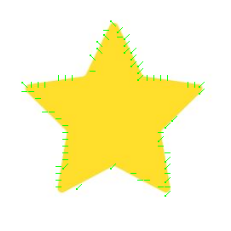

EDH feature vector:  (1024, 5)


In [5]:
# 32x32 cells -> each  8x8 window => (5 values for each edge kernel) => (1024, 5) feature vector
grayimage = grayscale_image(image)
ehd_features = get_edge_histogram_descriptor(grayimage, window_size, norm)
ehd_features_size = int(image.shape[0]/window_size)
show_edge_histogram_image(image, ehd_features, ehd_features_size, window_size)
print("EDH feature vector: ", ehd_features.shape)

## Sobel Edge Descriptors 
(on non-overlapping regions)

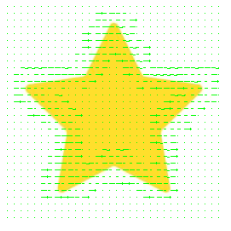

Sobel edges feature vector:  (1024, 8)


In [6]:

# 32x32 cells -> each  8x8 window => (8 bins/ranges for the angles accumalating the magnitude for each range in the window) => (1024, 8) feature vector
bins_number = 8 # bins for the angles distribution in the histograms
grayimage = grayscale_image(image)
sobel_features = get_sobel_features(grayimage, window_size, bins_number, norm)
sobel_features_size = int(image.shape[0]/window_size)
show_sobel_edges_image(image, sobel_features, sobel_features_size, window_size, bins_number)
print("Sobel edges feature vector: ", np.shape(sobel_features))